In [2]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
import matplotlib.pyplot as plt

In [3]:
train = tf.keras.utils.image_dataset_from_directory(r"S:\Aeroplane Damage Detection\CNN model\Dataset\train",
                                                      batch_size = 100,
                                                      image_size = (128,128),
                                                      seed=123)

Found 3480 files belonging to 3 classes.


In [4]:
val = tf.keras.utils.image_dataset_from_directory(r"S:\Aeroplane Damage Detection\CNN model\Dataset\valid",
                                                  batch_size = 100,
                                                  image_size = (128,128),
                                                  seed=123)

Found 530 files belonging to 3 classes.


In [5]:
class_names = train.class_names
print(class_names)

['Both', 'Crack', 'Dent']


In [6]:
train = train.map(lambda x,y:(x/255,y))
val = val.map(lambda x,y:(x/255,y))

(128, 128, 3)


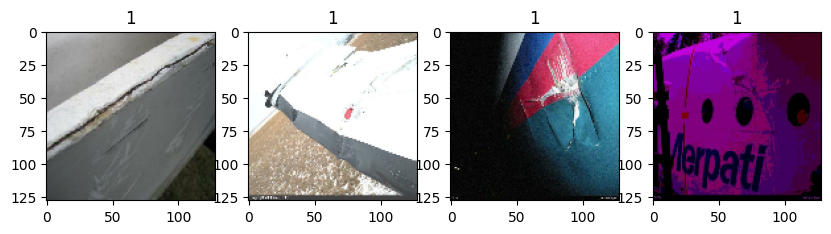

In [7]:
batch = train.as_numpy_iterator().next()
print(batch[0][1].shape)
fig,ax  = plt.subplots(ncols=4,figsize=(10,10))
for indx,img in enumerate(batch[0][:4]):
  ax[indx].imshow(img)
  ax[indx].title.set_text(batch[1][indx])

In [8]:
train = train.shuffle(len(train))

In [9]:
augmentationModel = tf.keras.Sequential(
    [
        tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
        tf.keras.layers.experimental.preprocessing.RandomRotation(factor=0.02),
    ]
)

In [10]:
train = train.map(lambda x , y: (augmentationModel(x) , y))

In [15]:
model = Sequential([
      Conv2D(filters=32, kernel_size=(2, 2), activation='relu', input_shape=(128, 128, 3)),
      MaxPooling2D((2, 2)),
      Conv2D(filters=128, kernel_size=(2, 2), activation='relu'),
      MaxPooling2D((2, 2)),
      Conv2D(filters=256, kernel_size=(2, 2), activation='relu'),
      MaxPooling2D((2, 2)),
      Dropout(0.4),
      Flatten(),
      Dense(128, activation='relu'),
      Dense(3, activation='softmax')
])

In [16]:
model.compile(
    optimizer = 'Adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=[
        tf.keras.metrics.SparseCategoricalAccuracy(name = 'Accuracy'),
        tf.keras.metrics.SparseTopKCategoricalAccuracy(10,name="top-10-Accuracy"),
    ],
)

In [17]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 127, 127, 32)      416       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 62, 62, 128)       16512     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 31, 31, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 30, 30, 256)       131328    
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 15, 15, 256)      

In [18]:
history = model.fit(train,epochs=25,validation_data=val)

Epoch 1/25

35/35 [==============================] - 37s 981ms/step - loss: 1.0157 - Accuracy: 0.5678 - top-10-Accuracy: 1.0000 - val_loss: 1.0134 - val_Accuracy: 0.5434 - val_top-10-Accuracy: 1.0000
Epoch 2/25
35/35 [==============================] - 40s 1s/step - loss: 0.8488 - Accuracy: 0.6204 - top-10-Accuracy: 1.0000 - val_loss: 0.9254 - val_Accuracy: 0.5415 - val_top-10-Accuracy: 1.0000
Epoch 3/25
35/35 [==============================] - 45s 1s/step - loss: 0.7865 - Accuracy: 0.6468 - top-10-Accuracy: 1.0000 - val_loss: 0.8406 - val_Accuracy: 0.6113 - val_top-10-Accuracy: 1.0000
Epoch 4/25
35/35 [==============================] - 49s 1s/step - loss: 0.7161 - Accuracy: 0.6810 - top-10-Accuracy: 1.0000 - val_loss: 0.8130 - val_Accuracy: 0.6264 - val_top-10-Accuracy: 1.0000
Epoch 5/25
35/35 [==============================] - 56s 1s/step - loss: 0.6678 - Accuracy: 0.7060 - top-10-Accuracy: 1.0000 - val_loss: 0.7440 - val_Accuracy: 0.6717 - val_top-10-Accuracy: 1.0000
Epoch 6/25
35/35

In [24]:
test_metrics = model.evaluate(val)

6/6 [==============================] - 1s 174ms/step - loss: 0.7550 - Accuracy: 0.7755 - top-10-Accuracy: 1.0000


In [23]:
model.save("AeroplaneDamageDetection.h5")